In [1]:
from src.dispersion import * 
from src.VSH import * 
from src.extra_special import * 
from src.fields import (
    E_,
    H_,
    E_cart_,
    H_cart_
)
from src.AM import *
from src.misc import *

import numpy as np
import scipy.constants as const
import scipy.special as sp
from scipy import integrate
from cxroots import Rectangle, AnnulusSector, Circle
import cxroots
from icecream import ic

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patheffects as pe  # for text effects 
plt.rcParams.update({'font.size': 18})

Z_0 = np.sqrt(const.mu_0 / const.epsilon_0)  # vacuum impedance

In [2]:
particle_type = "dielectric"  # "dielectric" or "metallic"
eps_dielectric = 10 + 0.0j
mu_dielectric = 1.0 + 0.0j

n = 1  # m = -n, ..., n

a = 50*const.nano

mode_type = "TE"  # "TE" or "TM"

eps_out = 1
mu_out = 1

n_in = np.sqrt(eps_dielectric * mu_dielectric)
n_out = np.sqrt(eps_out * mu_out)

In [3]:
ka = 0.8

omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka
k0 = omega / const.speed_of_light

part = "both"

n, m = 1, 1

rrmax = np.linspace(0.2*a, stop=60*a, num=50)
W = np.array([])
W_analit = np.array([])

Jz = np.array([])
Lz = np.array([])
Sz = np.array([])

for rmax in rrmax:
    rr = np.linspace(0, stop=rmax, num=300)
    tt = np.linspace(0, stop=np.pi, num=50)
    phi = 2.0
    
    W = np.append(
        W, 
        ntrapz(
            lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
            x1 = rr,
            x2 = tt
        )
    )
    """
    Jz_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    Jz = np.append(Jz, Jz_int)
    
    Lz_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    Lz = np.append(Lz, Lz_int)
    
    Sz_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    Sz = np.append(Sz, Sz_int)
    """
    

/home/ivan/Documents/code/quant_sphere/src/VSH.py:436: RuntimeWarning: invalid value encountered in true_divide
  Nr = n*(n+1) * zn/rho * Ymn
/home/ivan/Documents/code/quant_sphere/src/VSH.py:437: RuntimeWarning: divide by zero encountered in true_divide
  Nt = 1/rho * (zn + rho * znp) * dYmn
/home/ivan/Documents/code/quant_sphere/src/VSH.py:437: RuntimeWarning: invalid value encountered in true_divide
  Nt = 1/rho * (zn + rho * znp) * dYmn
/home/ivan/Documents/code/quant_sphere/src/VSH.py:438: RuntimeWarning: divide by zero encountered in true_divide
  Np = 1j*m/np.sin(theta) * 1/rho * (zn + rho * znp) * Ymn
/home/ivan/Documents/code/quant_sphere/src/VSH.py:438: RuntimeWarning: invalid value encountered in true_divide
  Np = 1j*m/np.sin(theta) * 1/rho * (zn + rho * znp) * Ymn


In [7]:
ka = 0.8

omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka
k0 = omega / const.speed_of_light

part = "both"

n, m = 1, 1

rrmax = np.linspace(0.2*a, stop=60*a, num=50)
W = np.array([])
W_analit = np.array([])

Jz = np.array([])
Lz = np.array([])
Sz = np.array([])

for rmax in rrmax:
    ranges = [
        [0.01, rmax],  # r
        [0.001, np.pi-0.001]  # theta
    ]
    phi = 2.0
    
    W_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * W_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    W = np.append(W, W_int)
    
    #W_analit = np.append(W_analit, get_int_val(j, k0, a, n_in, n_out, rmax=rmax))
    
    """
    Jz_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Jz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    Jz = np.append(Jz, Jz_int)
    
    Lz_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Lz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    Lz = np.append(Lz, Lz_int)
    
    Sz_int = integrate.nquad(
        lambda x1, x2:  2*np.pi * np.sin(x2) * x1**2 * Sz_(m, n, x1, x2, phi, mode_type, a, omega, particle_type, eps_out, mu_out, eps_dielectric, mu_dielectric, part=part),
        ranges,
        opts={'epsrel':1e-3}    
    )[0]
    Sz = np.append(Sz, Sz_int)
    """
    

In [8]:
W

array([-1.47576803e-29, -1.47575902e-29, -1.47575001e-29, -1.47574101e-29,
       -1.47573200e-29, -1.47572299e-29, -1.47571399e-29, -1.47570498e-29,
       -1.47569597e-29, -1.47568697e-29, -1.47567796e-29, -1.47566895e-29,
       -1.47565995e-29, -1.47565094e-29, -1.47564193e-29, -1.47563293e-29,
       -1.47562392e-29, -1.47561492e-29, -1.47560591e-29, -1.47559690e-29,
       -1.47558790e-29, -1.47557889e-29, -1.47556988e-29, -1.47556088e-29,
       -1.47555187e-29, -1.47554286e-29, -1.47553386e-29, -1.47552485e-29,
       -1.47551585e-29, -1.47550684e-29, -1.47549783e-29, -1.47548883e-29,
       -1.47547982e-29, -1.47547081e-29, -1.47546181e-29, -1.47545280e-29,
       -1.47544380e-29, -1.47543479e-29, -1.47542578e-29, -1.47541678e-29,
       -1.47540777e-29, -1.47539877e-29, -1.47538976e-29, -1.47538075e-29,
       -1.47537175e-29, -1.47536274e-29, -1.47535374e-29, -1.47534473e-29,
       -1.47533572e-29, -1.47532672e-29])

In [71]:
j = n
A_TE = 1
B_TE = A_TE * sp.spherical_jn(j, n_in*a*k0) / spherical_h1(j, n_out*a*k0)

def num(r, j, k0, a, n_in, n_out):
    zj = np.where(
        r <= a,
        A_TE * sp.spherical_jn(j, n_in*r*k0),
        B_TE * spherical_h1(j, n_out*r*k0)
    )
    return 2 * r**2 * np.abs(zj)**2

def den(r, j, k0, a, n_in, n_out):
    zj = np.where(
        r <= a,
        A_TE * sp.spherical_jn(j, n_in*r*k0),
        B_TE * spherical_h1(j, n_out*r*k0)
    )
    zjm1 = np.where(
        r <= a,
        A_TE * sp.spherical_jn(j-1, n_in*r*k0),
        B_TE * spherical_h1(j-1, n_out*r*k0)
    )
    zjp1 = np.where(
        r <= a,
        A_TE * sp.spherical_jn(j+1, n_in*r*k0),
        B_TE * spherical_h1(j+1, n_out*r*k0)
    )
    
    return r**2 * (np.abs(zj)**2 + (j+1)/(2*j+1) * np.abs(zjm1)**2 + j/(2*j+1) * np.abs(zjp1)**2)

def get_int_val(j, k0, a, n_in, n_out, rmin=0, rmax=100):
    ranges = [[rmin, rmax]]
    
    prms = (j, k0, a, n_in, n_out)
    """
    int_num = integrate.nquad(
        lambda r: num(r, *prms), 
        ranges,
        opts={'epsrel':1e-9}    
    )[0] 
    int_den = integrate.nquad(
        lambda r: den(r, *prms), 
        ranges,
        opts={'epsrel':1e-9}    
    )[0]
    """
    
    rr = np.linspace(rmin, stop=rmax, num=1000)
    int_den = np.trapz(den(rr, *prms), rr)
    
    return 0.25*j*(j+1)*int_den #int_num / int_den 

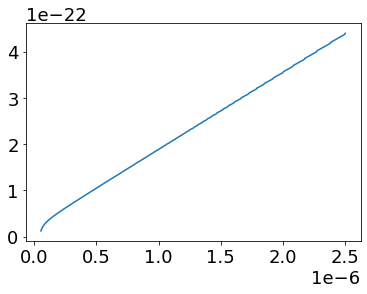

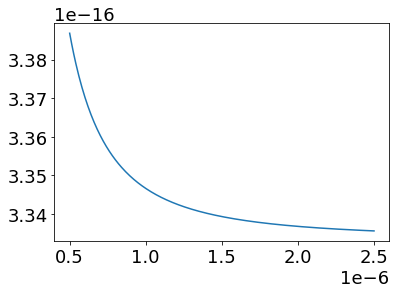

In [72]:
rr = np.linspace(10*a, stop=50*a, num=300)

rrmax = np.linspace(1.1*a, stop=50*a, num=400)

tmp = []
for rmax in rrmax:
    tmp.append(get_int_val(j, k0, a, n_in, n_out, rmin=0, rmax=rmax))

plt.plot(rrmax, tmp)
plt.show()
plt.plot(rr, den(rr, j, k0, a, n_in, n_out))
plt.show()

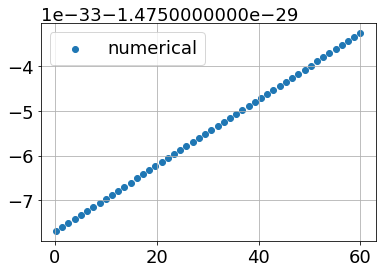

In [9]:
plt.scatter(rrmax/a, W, label='numerical')
#plt.scatter(rrmax/a, const.epsilon_0 * W_analit, label='analytical')
plt.legend()

plt.grid()
plt.show()

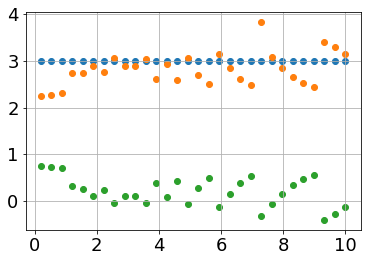

In [7]:
#plt.scatter(rrmax/a, W)
plt.scatter(rrmax/a, omega*np.array(Jz)/W)
plt.scatter(rrmax/a, omega*np.array(Lz)/W)
plt.scatter(rrmax/a, omega*np.array(Sz)/W)

plt.grid()

plt.show()

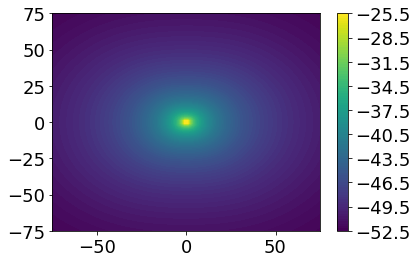

In [51]:
ka = 0.01

omega = const.speed_of_light / a / np.sqrt(eps_out * mu_out) * ka

N = 100
boxSize = 75*a

part = "both"

n = 1
m = 1

xx = np.linspace(-boxSize, stop=boxSize, num=N)
y = 0
zz = np.linspace(-boxSize, stop=boxSize, num=N)


X, Z = np.meshgrid(xx, zz, sparse=False, indexing='ij')

R, THETA, PHI = cart2sph(X, y, Z)

W = W_(
    m, n, 
    R, THETA, PHI, 
    mode_type, a, omega, particle_type, 
    eps_out, mu_out, eps_dielectric, mu_dielectric, part=part
)
plt.contourf(X/a, Z/a, np.log(W), cmap='viridis', levels=90)
plt.colorbar()
plt.show()

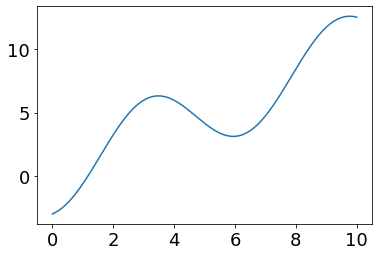

In [11]:
def foo(x):
    return x - 3*np.cos(x)

a, b = 0, 10

xx = np.linspace(a, stop=b, num=300)

plt.plot(xx, foo(xx))
plt.show()

In [12]:
sss = integrate.nquad(
        foo, 
        [[a, b]],
        opts={'epsrel':1e-9}    
    )[0] 

In [13]:
f = foo(xx)
dx = xx[1] - xx[0]

np.sum(f)*dx - sss

0.15899861328820464

In [14]:
np.trapz(f, xx) - sss

-0.00015213231762345458

In [15]:
midpoint_sum(foo, xx) - sss

7.606722238051589e-05

In [16]:
integrate.simpson(f, xx) - sss

7.212739490114473e-07

In [108]:
def midpoint_sum(foo, x):
    xmid = (x[1:] + x[:-1]) / 2 # https://stackoverflow.com/a/23856065
    dx = np.diff(x)  # x[1:] - x[:-1]
    return (foo(xmid) * dx).sum()

In [105]:
x = np.linspace(1, stop=8, num=8)
xmid = (x[1:] + x[:-1]) / 2 # https://stackoverflow.com/a/23856065
dx = x[1:] - x[:-1]
s = (foo(xmid) * dx).sum()
s

31.03729854823949

In [107]:
np.diff(x)

array([1., 1., 1., 1., 1., 1., 1.])

In [87]:
x[:-1]

array([1., 2., 3., 4., 5., 6., 7.])

In [88]:
x[1:]

array([2., 3., 4., 5., 6., 7., 8.])

In [33]:
def foo(x, y):
    return (x+y)*(x**2 + y)

ranges = [[0, 1], [0, 1]]

integrate.nquad(
    foo, 
    ranges,
    opts={'epsrel':1e-4}    
)[0]  # gives 1.5

1.0

In [44]:
xx = np.linspace(0, stop=1, num=30)
yy = np.linspace(0, stop=1, num=30)

X, Y = np.meshgrid(xx, yy, indexing='ij')

Z = foo(X, Y)

integrate.simpson(integrate.simpson(Z, Y), X[:, 0])


1.0000205010455532

In [103]:
def foo(x, y, z):
    #return np.sin((x+y)*(x**2 + y)*z)
    #return x + y + z
    return np.array([np.sin((x+y)*(x**2 + y)*z), x + y + z])

ranges = [[0, 1], [0, 1], [0, 1]]

integrate.nquad(
    foo, 
    ranges,
    opts={'epsrel':1e-4}    
)[0]  

TypeError: only size-1 arrays can be converted to Python scalars

In [104]:
xx_first = np.linspace(0, stop=0.5, num=90, endpoint=False)
xx = np.append(xx_first, np.linspace(0.5, stop=1, num=30))
#xx = np.linspace(0, stop=1, num=30)
yy = np.linspace(0, stop=1, num=30)
zz = np.linspace(0, stop=1, num=30)

X, Y, Z = np.meshgrid(xx, yy, zz, indexing='ij')

F = foo(X, Y, Z)

integrate.simpson(
    integrate.simpson(
        integrate.simpson(
            F, 
            Z), 
        Y[:,:,0]
    ), 
    X[:,0,0]
)

ValueError: If given, shape of x must be 1-D or the same as y.

In [105]:
np.trapz(np.trapz(np.trapz(F, Z), Y[:, :, 0]), X[:, 0, 0])

array([0.38378993, 1.5       ])

In [53]:
np.shape(X)
#X[:,0]

(30, 30, 30)

In [54]:
integrate.simpson(integrate.simpson(integrate.simpson(F, Z), Y[:,:,0]), X[:,0,0])

0.5000102505227766

In [55]:
ranges

[[0, 1], [0, 1], [0, 1]]

In [64]:
def foo(z):
    return 1/z

pp = np.linspace(0, 2*np.pi, num=300)

z_re = np.cos(pp)
z_im = np.sin(pp)

z = z_re + 1j * z_im

f = foo(z)

integrate.simpson(f, z) / (2*np.pi * 1j)

(0.9999997149937558+6.513994098592001e-19j)

In [66]:
np.trapz(f, z) / (2*np.pi * 1j)

(0.9999264036085473-1.218738751837311e-18j)

In [107]:
g = None
if g is not None:
    print('yes')